In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

In [12]:
data = pd.read_csv('../fichier_csv/billets.csv')

# Vérification de la présence de valeurs manquantes

In [13]:
sys.path.append('../../project_5_prod_market_study/code')

In [14]:
import my_functions_revue as mfct

In [ ]:
mfct.verif_presence_nan_in_df(data,'data')

# Vérification de la presence de doublons

In [6]:
mfct.verif_doublon(data,'data')

Absence de doublon, il n'y a pas de retraitement à faire pour data


# Vérification de la présence de valeurs aberrantes

In [7]:
data.columns

Index(['is_genuine', 'length', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'diagonal'],
      dtype='object')

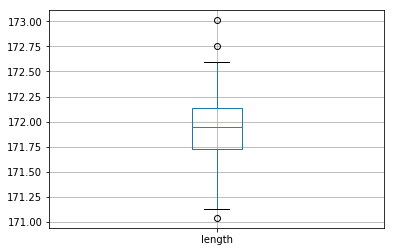

In [8]:
data.boxplot(column='length')

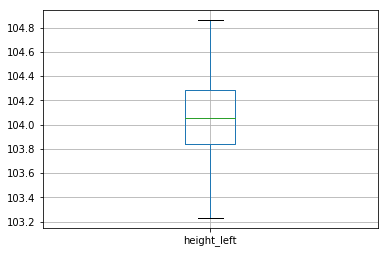

In [9]:
data.boxplot(column='height_left')

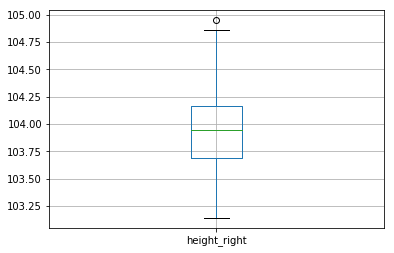

In [10]:
data.boxplot(column='height_right')

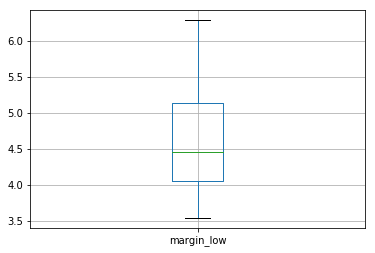

In [11]:
data.boxplot(column='margin_low')

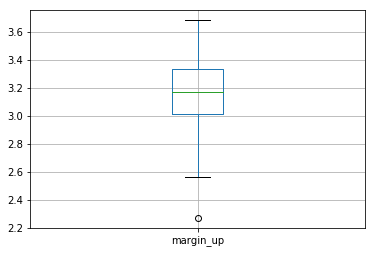

In [12]:
data.boxplot(column='margin_up')

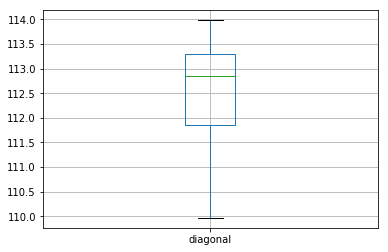

In [13]:
data.boxplot(column='diagonal')

# Conclusion 
3 outliers pour lenght <br/>
1 outlier pour height_right <br/>
1 outlier pour margin_up <br/>

Nous allons les laisser.

# Afin d'introduire votre analyse, effectuez une brève description des données (analyses univariées et bivariées).

## Analyses bivariées

Choisir représentation : Camenbert ('camenb') ou Tuyau d'orgue ('tuyau') :camenb
Voulez-vous afficher les couleurs ? (y/n)n
affichage des couleurs non demandé
Choisir couleur du graphique :Greens
Donner le nom du titre du graphique :Répartion des billets
Donner le nom de l'axe des ordonnés du graphique :Type billet


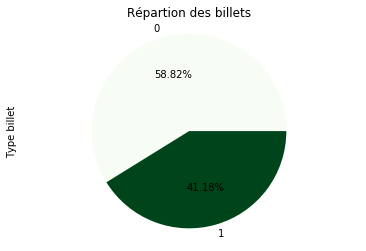

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
Variable is_genuine :
        - Moyenne = 0.5882352941176471
        - Médiane = 1.0
        - Mode = 0    True
dtype: bool
Variable is_genuine :
        - Variance = 0.24221453287197228
        - Ecart-type = 0.4921529567847503


,is_genuine,n,f
0,True,100,0.588235
1,False,70,0.411765


In [14]:
mfct.analyse_qual(data,'is_genuine','qual')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :hist
Voulez-vous afficher les couleurs ? (y/n)y
dict_items([('aliceblue', '#F0F8FF'), ('salmon', '#FA8072'), ('mediumslateblue', '#7B68EE'), ('antiquewhite', '#FAEBD7'), ('ivory', '#FFFFF0'), ('lightskyblue', '#87CEFA'), ('chartreuse', '#7FFF00'), ('green', '#008000'), ('royalblue', '#4169E1'), ('orange', '#FFA500'), ('seagreen', '#2E8B57'), ('lightseagreen', '#20B2AA'), ('lightgreen', '#90EE90'), ('lightgrey', '#D3D3D3'), ('dodgerblue', '#1E90FF'), ('darkslateblue', '#483D8B'), ('mintcream', '#F5FFFA'), ('olivedrab', '#6B8E23'), ('mediumseagreen', '#3CB371'), ('paleturquoise', '#AFEEEE'), ('rosybrown', '#BC8F8F'), ('lightsalmon', '#FFA07A'), ('lightcyan', '#E0FFFF'), ('dimgrey', '#696969'), ('slategrey', '#708090'), ('darkslategrey', '#2F4F4F'), ('yellow', '#FFFF00'), ('cadetblue', '#5F9EA0'), ('maroon', '#8000

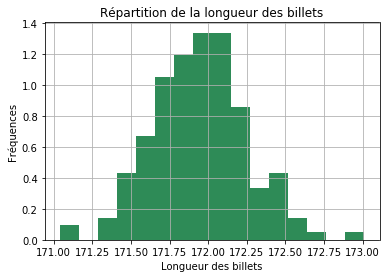

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
Variable length :
        - Moyenne = 171.94058823529411
        - Médiane = 171.945
        - Mode = 0    172.1
dtype: float64
Variable length :
        - Variance = 0.09294435986159195
        - Ecart-type = 0.30486777439013124


,length,n,f,F
71,"(171.038, 171.163]",1,0.005882,0.005882
52,"(171.038, 171.163]",1,0.005882,0.011765
66,"(171.286, 171.409]",1,0.005882,0.017647
29,"(171.286, 171.409]",2,0.011765,0.029412
33,"(171.409, 171.532]",2,0.011765,0.041176
75,"(171.409, 171.532]",1,0.005882,0.047059
81,"(171.409, 171.532]",1,0.005882,0.052941
50,"(171.409, 171.532]",1,0.005882,0.058824
26,"(171.409, 171.532]",2,0.011765,0.070588
79,"(171.409, 171.532]",1,0.005882,0.076471


In [18]:
mfct.analyse_vqtecont(data,'length','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :boxplot
Afficher les outliers (y/n) :y
Donner le nom du titre du graphique :Répartition des hauteurs gauche des billets
Donner le nom de l'axe des abcisses du graphique :Hauteur gauche du billet


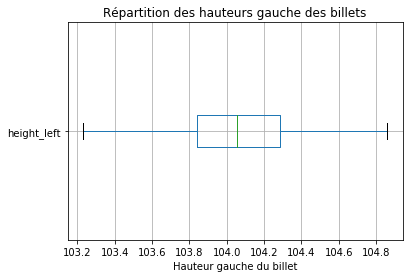

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
La mediane est 104.055, Q1 est égal à 103.8425 et Q3 est égal à 104.2875 
            L'écart inter-quartile est égal à 0.4449999999999932 et les bornes sont respectivement de 103.23 à 104.86
Variable height_left :
        - Moyenne = 104.06635294117646
        - Médiane = 104.055
        - Mode = 0    104.17
1    104.32
dtype: float64
Variable height_left :
        - Variance = 0.08839140484429059
        - Ecart-type = 0.29730692027648903


,height_left,n,f,F
79,"(103.228, 103.339]",1,0.005882,0.005882
90,"(103.447, 103.556]",1,0.005882,0.011765
69,"(103.447, 103.556]",1,0.005882,0.017647
47,"(103.447, 103.556]",2,0.011765,0.029412
63,"(103.447, 103.556]",1,0.005882,0.035294
76,"(103.447, 103.556]",1,0.005882,0.041176
85,"(103.556, 103.665]",1,0.005882,0.047059
86,"(103.556, 103.665]",1,0.005882,0.052941
89,"(103.556, 103.665]",1,0.005882,0.058824
11,"(103.556, 103.665]",3,0.017647,0.076471


In [6]:
mfct.analyse_vqtecont(data,'height_left','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :hist
Voulez-vous afficher les couleurs ? (y/n)n
affichage des couleurs non demandé
Choisir couleur du graphique :chartreuse
Donner le nom du titre du graphique :Répartion des hauteurs droite des billets
Donner le nom de l'axe des ordonnés du graphique :
Donner le nom de l'axe des abcisses du graphique :Hauteur droite du billet


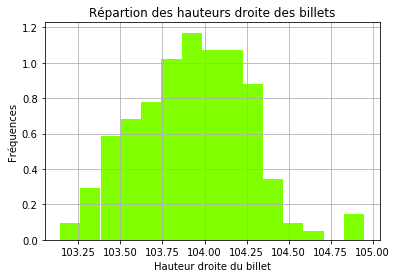

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
Variable height_right :
        - Moyenne = 103.92811764705881
        - Médiane = 103.95
        - Mode = 0    103.76
1    104.06
dtype: float64
Variable height_right :
        - Variance = 0.10890351557093417
        - Ecart-type = 0.330005326579639


,height_right,n,f,F
94,"(103.138, 103.261]",1,0.005882,0.005882
50,"(103.138, 103.261]",1,0.005882,0.011765
78,"(103.261, 103.381]",1,0.005882,0.017647
79,"(103.261, 103.381]",1,0.005882,0.023529
56,"(103.261, 103.381]",1,0.005882,0.029412
67,"(103.261, 103.381]",1,0.005882,0.035294
76,"(103.261, 103.381]",1,0.005882,0.041176
88,"(103.261, 103.381]",1,0.005882,0.047059
86,"(103.381, 103.502]",1,0.005882,0.052941
24,"(103.381, 103.502]",2,0.011765,0.064706


In [7]:
mfct.analyse_vqtecont(data,'height_right','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :boxplot
Afficher les outliers (y/n) :y
Donner le nom du titre du graphique :Répartition des marges basses des billets
Donner le nom de l'axe des abcisses du graphique :Marge basse du billet


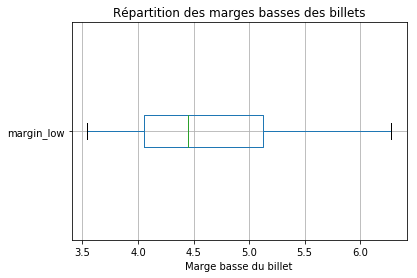

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
La mediane est 4.45, Q1 est égal à 4.05 et Q3 est égal à 5.1275 
            L'écart inter-quartile est égal à 1.0775000000000006 et les bornes sont respectivement de 3.54 à 6.28
Variable margin_low :
        - Moyenne = 4.612117647058823
        - Médiane = 4.45
        - Mode = 0    3.97
1    4.08
dtype: float64
Variable margin_low :
        - Variance = 0.4900484567474049
        - Ecart-type = 0.7000346111067687


,margin_low,n,f,F
117,"(3.537, 3.789]",1,0.005882,0.005882
119,"(3.537, 3.789]",1,0.005882,0.011765
18,"(3.537, 3.789]",2,0.011765,0.023529
118,"(3.537, 3.789]",1,0.005882,0.029412
16,"(3.537, 3.789]",2,0.011765,0.041176
89,"(3.537, 3.789]",1,0.005882,0.047059
81,"(3.537, 3.789]",1,0.005882,0.052941
113,"(3.537, 3.789]",1,0.005882,0.058824
37,"(3.537, 3.789]",1,0.005882,0.064706
52,"(3.537, 3.789]",1,0.005882,0.070588


In [8]:
mfct.analyse_vqtecont(data,'margin_low','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :hist
Voulez-vous afficher les couleurs ? (y/n)n
affichage des couleurs non demandé
Choisir couleur du graphique :olivedrab
Donner le nom du titre du graphique :Répartition des marges hautes des billets
Donner le nom de l'axe des ordonnés du graphique :
Donner le nom de l'axe des abcisses du graphique :Marge haute du billet


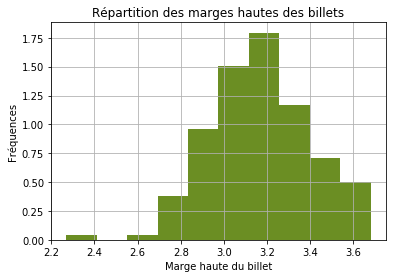

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
Variable margin_up :
        - Moyenne = 3.1704117647058827
        - Médiane = 3.17
        - Mode = 0    3.07
1    3.24
dtype: float64
Variable margin_up :
        - Variance = 0.05553806574394464
        - Ecart-type = 0.2356651559818393


,margin_up,n,f,F
72,"(2.269, 2.411]",1,0.005882,0.005882
57,"(2.552, 2.693]",1,0.005882,0.011765
46,"(2.693, 2.834]",2,0.011765,0.023529
51,"(2.693, 2.834]",1,0.005882,0.029412
60,"(2.693, 2.834]",1,0.005882,0.035294
80,"(2.693, 2.834]",1,0.005882,0.041176
54,"(2.693, 2.834]",1,0.005882,0.047059
25,"(2.693, 2.834]",2,0.011765,0.058824
49,"(2.693, 2.834]",1,0.005882,0.064706
39,"(2.834, 2.975]",2,0.011765,0.076471


In [16]:
mfct.analyse_vqtecont(data,'margin_up','qtecont')

Voulez-vous afficher la courbe de lorenz et l'indice de gini ? (y/n)n
Mesure de concentration non affichée
Choisir représentation : Histogramme ('hist') ou BoxPlot ('boxplot') :boxplot
Afficher les outliers (y/n) :y
Donner le nom du titre du graphique :Répartition des diagonales des billets
Donner le nom de l'axe des abcisses du graphique :Diagonale du billet


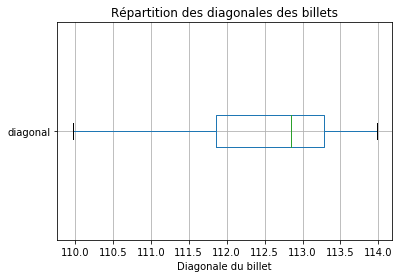

Sauvegarder l'image ? (y/n) :n
Pas de sauvegarde
La mediane est 112.845, Q1 est égal à 111.85499999999999 et Q3 est égal à 113.2875 
            L'écart inter-quartile est égal à 1.4325000000000045 et les bornes sont respectivement de 109.97 à 113.98
Variable diagonal :
        - Moyenne = 112.5704117647059
        - Médiane = 112.845
        - Mode = 0    113.38
dtype: float64
Variable diagonal :
        - Variance = 0.8495768892733561
        - Ecart-type = 0.9217249531575871


,diagonal,n,f,F
33,"(109.966, 110.237]",1,0.005882,0.005882
89,"(110.237, 110.505]",1,0.005882,0.011765
111,"(110.237, 110.505]",1,0.005882,0.017647
59,"(110.505, 110.772]",1,0.005882,0.023529
45,"(110.505, 110.772]",1,0.005882,0.029412
92,"(110.505, 110.772]",1,0.005882,0.035294
118,"(110.505, 110.772]",1,0.005882,0.041176
62,"(110.505, 110.772]",1,0.005882,0.047059
64,"(110.505, 110.772]",1,0.005882,0.052941
66,"(110.772, 111.039]",1,0.005882,0.058824


In [17]:
mfct.analyse_vqtecont(data,'diagonal','qtecont')

## Analyses bivariées

# Vous réaliserez une Analyse en Composantes Principales de l'échantillon, en suivant toutes ces étapes :

    Analyse de l'éboulis des valeurs propres
    Représentation des variables par le cercle des corrélations
    Représentation des individus par les plans factoriels
    Analyser la qualité de représentation et la contribution des individus.

Pour chacune de ces étapes, commentez les résultats obtenus. La variable donnant la nature Vrai/Faux du billet sera utilisée comme variable illustrative.

## Analyse de l'éboulis des valeurs propres

In [141]:
data_acp = data.copy()
data_acp_ind = data.copy()
data_acp.index = data_acp['is_genuine']
del data_acp['is_genuine']

In [142]:
X = data_acp.values

In [143]:
n_components = 2

In [144]:
pca = PCA(n_components=n_components)
reduction = pca.fit_transform(X)

In [145]:
pca.components_

array([[-0.02877961,  0.1409981 ,  0.16592565,  0.53369186,  0.1025611 ,
        -0.81019391],
       [ 0.07995139, -0.08296975, -0.17347194, -0.78832839,  0.18456518,
        -0.54873065]])

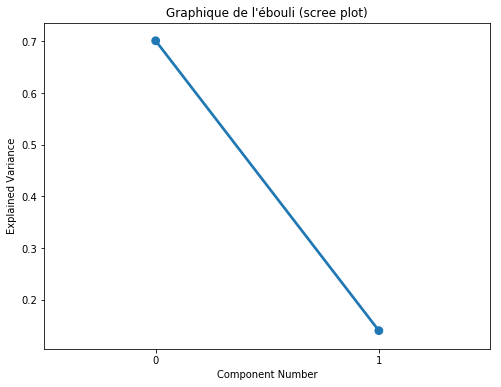

In [146]:
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title("Graphique de l'ébouli (scree plot)")
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

##     Représentation des variables par le cercle des corrélations


In [147]:
for i in range(0, n_components):
    data_acp_ind['PC' + str(i + 1)] = reduction[:, i]

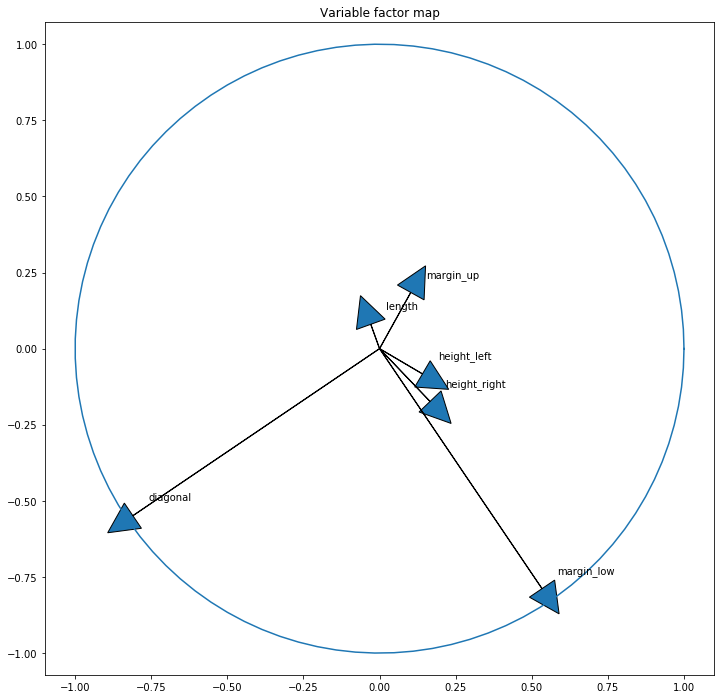

In [148]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(12, 12))
for i in range(0, len(pca.components_.T)):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
         pca.components_[1, i] + 0.05,
         data_acp.columns.values[i])

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

##     Représentation des individus par les plans factoriels


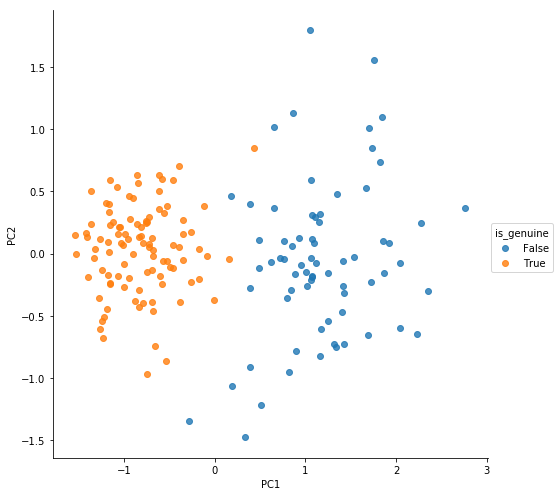

In [149]:
g = sns.lmplot('PC1',
               'PC2',
               hue='is_genuine',data=data_acp_ind,
               fit_reg=False,
               scatter=True,
               size=7)

## Analyser la qualité de représentation et la contribution des individus.


In [35]:
pca.explained_variance_ratio_

array([0.70119248, 0.14020178])

In [36]:
coefficients = pca.components_.T * np.sqrt(pca.explained_variance_)
df_coefficients = pd.DataFrame(data = coefficients, columns = ['principal component 1', 'principal component 2'],index=data_acp.columns)
df_coefficients

,principal component 1,principal component 2
length,-0.031379,0.038979
height_left,0.153732,-0.040451
height_right,0.180911,-0.084574
margin_low,0.581892,-0.384341
margin_up,0.111824,0.089983
diagonal,-0.883366,-0.267528


# Appliquer un algorithme de classification, puis analysez le résultat obtenu.



In [151]:
data_cah_ind = data.copy()
data_cah = data.copy()

In [152]:
data_cah_ind['is_genuine'] = data_cah_ind.index
del data_cah_ind['is_genuine']

In [153]:
X = data_cah_ind.values


cah = AgglomerativeClustering(n_clusters=2)
Y = pd.DataFrame(cah.fit_predict(X), columns=['cluster ID'])
result_cah = pd.concat([Y, data_cah], axis=1)
result_cah.head(10)

,cluster ID,is_genuine,length,height_left,height_right,margin_low,margin_up,diagonal
0,1,True,171.81,104.86,104.95,4.52,2.89,112.83
1,1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,1,True,171.83,103.76,103.76,4.40,2.88,113.84
3,1,True,171.80,103.78,103.65,3.73,3.12,113.63
4,1,True,172.05,103.70,103.75,5.04,2.27,113.55
5,1,True,172.57,104.65,104.44,4.54,2.99,113.16
6,1,True,172.38,103.55,103.80,3.97,2.90,113.30
7,1,True,171.58,103.65,103.37,3.54,3.19,113.38
8,1,True,171.96,103.51,103.75,4.06,3.33,113.53
9,1,True,172.14,104.34,104.20,4.63,3.02,112.47


# Visualisez la partition obtenue dans le premier plan factoriel de l'ACP, puis analysez-la.

In [156]:
a=data_acp_ind
b = a.join(result_cah['cluster ID'])
b.head()

,is_genuine,length,height_left,height_right,margin_low,margin_up,diagonal,PC1,PC2,cluster ID
0,True,171.81,104.86,104.95,4.52,2.89,112.83,-0.003021,-0.375137,1
1,True,171.67,103.74,103.70,4.01,2.87,113.29,-1.011240,0.069376,1
2,True,171.83,103.76,103.76,4.40,2.88,113.84,-1.239511,-0.537303,1
3,True,171.80,103.78,103.65,3.73,3.12,113.63,-1.416897,0.165430,1
4,True,172.05,103.70,103.75,5.04,2.27,113.55,-0.742004,-0.970984,1


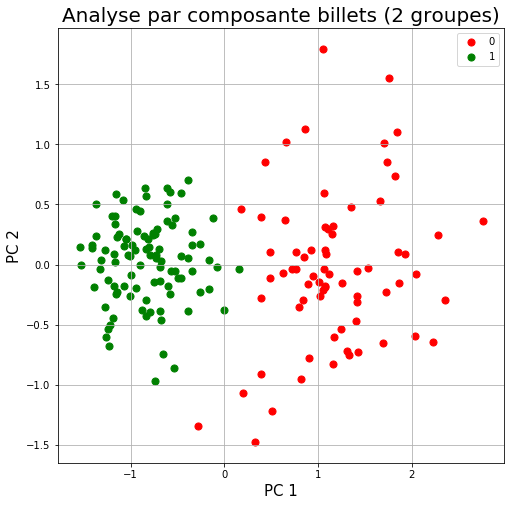

In [158]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel("PC 1", fontsize = 15)
ax.set_ylabel("PC 2", fontsize = 15)
ax.set_title('Analyse par composante billets (2 groupes)', fontsize = 20)

targets = [0,1]
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = b['cluster ID'] == target
    ax.scatter(b.loc[indicesToKeep, 'PC1']
               , b.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#fig.savefig